In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


In [3]:
from tensorflow.examples.tutorials.mnist import input_data

In [5]:
mnist=input_data.read_data_sets("MNIST_data", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [6]:
num_inputs=784
neurons_hid1=392
neurons_hid2=196
neurons_hid3=neurons_hid1
num_outputs=num_inputs

In [7]:
learning_rate=0.01

In [8]:
actf=tf.nn.relu

In [9]:
X=tf.placeholder(tf.float32, shape=[None, num_inputs])

In [17]:
#it is an initializer which is capable of adapting its scale to the shape of the weights tensors


initializer=tf.variance_scaling_initializer()

In [16]:
tf.variance_scaling_initializer?


In [19]:
w1=tf.Variable(initializer([num_inputs, neurons_hid1]),dtype=tf.float32)
w2=tf.Variable(initializer([neurons_hid1, neurons_hid2]),dtype=tf.float32)
w3=tf.Variable(initializer([neurons_hid2, neurons_hid3]),dtype=tf.float32)
w4=tf.Variable(initializer([neurons_hid3, num_outputs]),dtype=tf.float32)

In [20]:
b1=tf.Variable(tf.zeros(neurons_hid1))
b2=tf.Variable(tf.zeros(neurons_hid2))
b3=tf.Variable(tf.zeros(neurons_hid3))
b4=tf.Variable(tf.zeros(num_outputs))

In [21]:
  act_func=tf.nn.relu

In [24]:
hid_layer1=act_func(tf.matmul(X, w1) + b1)
hid_layer2=act_func(tf.matmul(hid_layer1, w2) + b2)
hid_layer3=act_func(tf.matmul(hid_layer2, w3) + b3)
output_layer=act_func(tf.matmul(hid_layer3, w4) + b4)

In [25]:
loss=tf.reduce_mean(tf.square(output_layer-X))

In [27]:
optimizer=tf.train.AdamOptimizer(learning_rate)
train=optimizer.minimize(loss)

In [28]:
init=tf.global_variables_initializer()


In [30]:
saver=tf.train.Saver()

In [33]:
num_epochs=5
batch_size=128

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(num_epochs):
        num_batches=mnist.train.num_examples //batch_size
        
        for iteration in range(num_batches):
            
            x_batch, y_batch=mnist.train.next_batch(batch_size)
            
            sess.run(train, feed_dict={X:x_batch})
        training_loss = loss.eval(feed_dict={X:x_batch})
        
        
        print("EPOCH: {}   LOSS: {}".format(epoch, training_loss))
        
    saver.save(sess, './stacked_autoencoder.ckpt')

EPOCH: 0   LOSS: 0.026793695986270905
EPOCH: 1   LOSS: 0.024112161248922348
EPOCH: 2   LOSS: 0.02346949651837349
EPOCH: 3   LOSS: 0.02379119209945202
EPOCH: 4   LOSS: 0.023667097091674805


In [34]:
num_test_images= 10

with tf.Session() as sess: 
    
    saver.restore(sess,  './stacked_autoencoder.ckpt' )
    
    results=output_layer.eval(feed_dict={X:mnist.test.images[:num_test_images]})

INFO:tensorflow:Restoring parameters from ./stacked_autoencoder.ckpt


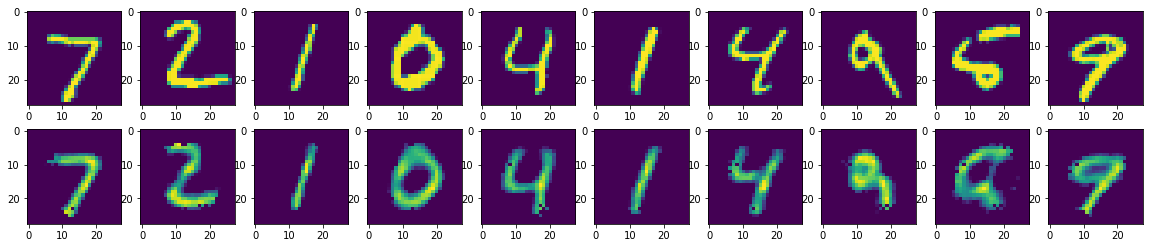

In [37]:
f, a=plt.subplots(2, 10, figsize=(20,4))

for i in range(num_test_images):
    a[0][i].imshow(np.reshape(mnist.test.images[i], (28,28))  )
    a[1][i].imshow(np.reshape(results[i], (28,28))  )
    